In [72]:
import pandas as pd
import os
import glob
import matplotlib.ticker as ticker
from statannot import add_stat_annotation


import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import os
from matplotlib.ticker import MaxNLocator

In [102]:
import os
import glob
import pandas as pd

#pkl_dir = '/data/users2/jwardell1/undersampling-project/HCP/pkl-files'
pkl_dir = '/data/users2/jwardell1/undersampling-project/OULU/pkl-files'

# Read and concatenate sr1 data
joined_files = os.path.join(pkl_dir, 'sr1_*.pkl')
joined_list = glob.glob(joined_files)
sr1 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr1') for file in joined_list), ignore_index=True)

# Read and concatenate sr2 data
joined_files = os.path.join(pkl_dir, 'sr2_*.pkl')
joined_list = glob.glob(joined_files)
sr2 = pd.concat((pd.read_pickle(file).assign(sampling_rate='sr2') for file in joined_list), ignore_index=True)

# Read and concatenate concat data
joined_files = os.path.join(pkl_dir, 'concat_*.pkl')
joined_list = glob.glob(joined_files)
concat = pd.concat((pd.read_pickle(file).assign(sampling_rate='concat') for file in joined_list), ignore_index=True)

# Read and concatenate add data
joined_files = os.path.join(pkl_dir, 'add_*.pkl')
joined_list = glob.glob(joined_files)
add = pd.concat((pd.read_pickle(file).assign(sampling_rate='add') for file in joined_list), ignore_index=True)

# Concatenate all dataframes
all_data = pd.concat([sr1, sr2, concat, add], ignore_index=True)



In [103]:
all_data

,graph_no,noise_no,snr,scalar,classifier,test_scores,target,predictions,test_proba,sampling_rate
0,59,0,0.80,0.398107,Logistic Regression,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1
1,59,0,0.80,0.398107,Multilayer Perceptron,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.976509 1 0.989839 2 0.99...,sr1
2,59,0,0.80,0.398107,Naive Bayes,0 1.0 1 0.5 2 1.0 3 0...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.0 1 0.0 2 0.0 3 0....,sr1
3,59,0,0.80,0.398107,SVM,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.387248 1 0.378362 2 0.38...,sr1
4,59,1,0.80,0.398107,Logistic Regression,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1
...,...,...,...,...,...,...,...,...,...,...
48043,1000,1,0.85,0.375837,SVM,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.15714 1 0.168438 2 0.1...,add
48044,1000,2,0.85,0.375837,Logistic Regression,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, ...",0 0.4983 1 0.738883 2 0.73...,add
48045,1000,2,0.85,0.375837,Multilayer Perceptron,0 1.0 1 1.0 2 1.0 3 1.0 4 1.0 5...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.240831 1 0.348377 2 0.32...,add
48046,1000,2,0.85,0.375837,Naive Bayes,0 1.0 1 1.0 2 1.0 3 ...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.0 1 0.0 2 0.0 3 0....,add


In [90]:
all_data.to_csv('all_data.csv')

In [104]:
import pandas as pd

# Function to split each row into multiple rows based on cross-validation index
def split_row(row):
    new_rows = []
    for cv_ix, auc in enumerate(row['test_scores']):
        new_row = row.copy()
        new_row['auc'] = auc
        new_row['cv_ix'] = cv_ix
        new_rows.append(new_row)
    return pd.DataFrame(new_rows)

# Apply the split_row function to each row of the dataframe and concatenate the results
result_df = pd.concat(all_data.apply(split_row, axis=1).tolist(), ignore_index=True)

# Drop the original 'test_scores' column as it's no longer needed
result_df.drop('test_scores', axis=1, inplace=True)

result_df


,graph_no,noise_no,snr,scalar,classifier,target,predictions,test_proba,sampling_rate,auc,cv_ix
0,59,0,0.80,0.398107,Logistic Regression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1,1.0,0
1,59,0,0.80,0.398107,Logistic Regression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1,1.0,1
2,59,0,0.80,0.398107,Logistic Regression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1,1.0,2
3,59,0,0.80,0.398107,Logistic Regression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1,1.0,3
4,59,0,0.80,0.398107,Logistic Regression,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...",0 0.983017 1 0.990367 2 0.99...,sr1,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...
480475,1000,2,0.85,0.375837,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.15714 1 0.168438 2 0.1...,add,1.0,5
480476,1000,2,0.85,0.375837,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.15714 1 0.168438 2 0.1...,add,1.0,6
480477,1000,2,0.85,0.375837,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.15714 1 0.168438 2 0.1...,add,1.0,7
480478,1000,2,0.85,0.375837,SVM,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0 0.15714 1 0.168438 2 0.1...,add,1.0,8


'\nfig.legend_.remove()\nfig.set_grid(False)\nfig.set_xlabel(None)\nfig.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])\nfig.set_ylim(0.45, 1.05)\nfig.set_ylabel("ROC AUC")\nfig.set_title(\'HCP Dataset\')\n'

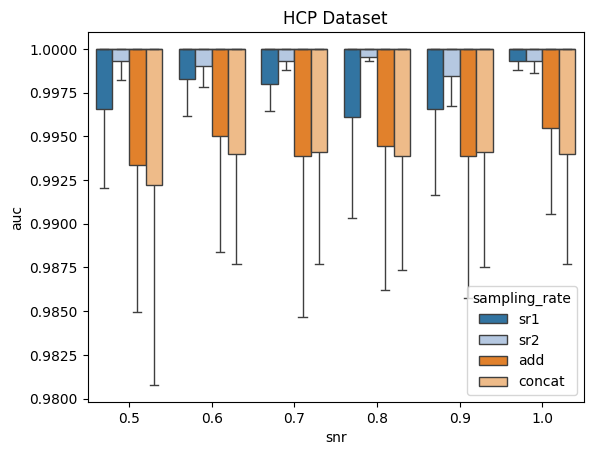

In [101]:
#see row 1 plotting in pavel plotting script

snr_levels = ['0.5', '0.6', '0.7', '0.8', '0.9', '1.0']
classifiers = ['Multilayer Perceptron', 'Logistic Regression', 'SVM', 'Naive Bayes']
sampling_rates = ['sr1', 'sr2', 'add', 'concat']
hue_order = sampling_rates
palette = { item: plt.cm.tab20(i) for i, item in enumerate(sampling_rates)}

#fig, axes = plt.subplots(nrows=1, ncols=96, figsize=(18,10), sharex=True, sharey=True)


boxplot = sns.boxplot(
    x="snr", 
    order=snr_levels,
    y="auc",
    hue="sampling_rate",
    hue_order=hue_order,
    data=result_df,
    palette=palette,
    showfliers = False
).set_title("HCP Dataset")





'''
fig.legend_.remove()
fig.set_grid(False)
fig.set_xlabel(None)
fig.set_yticks([0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0])
fig.set_ylim(0.45, 1.05)
fig.set_ylabel("ROC AUC")
fig.set_title('HCP Dataset')
'''

